# UAC20 Audio Class Device Topology Plotting - simplified

In [1]:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..', 'codes')))

path = os.sep.join(['..', '..', '..', '..', '..', '待處理', 'Universal Serial Bus', 'bitbucket', 'github', 'codes'])
sys.path.append(path) 

path = os.sep.join(['..', '..', '..', '..', '..', '待處理', 'ORM', 'bitbucket', 'github', 'codes'])
sys.path.append(path)

## Plot Topolograph

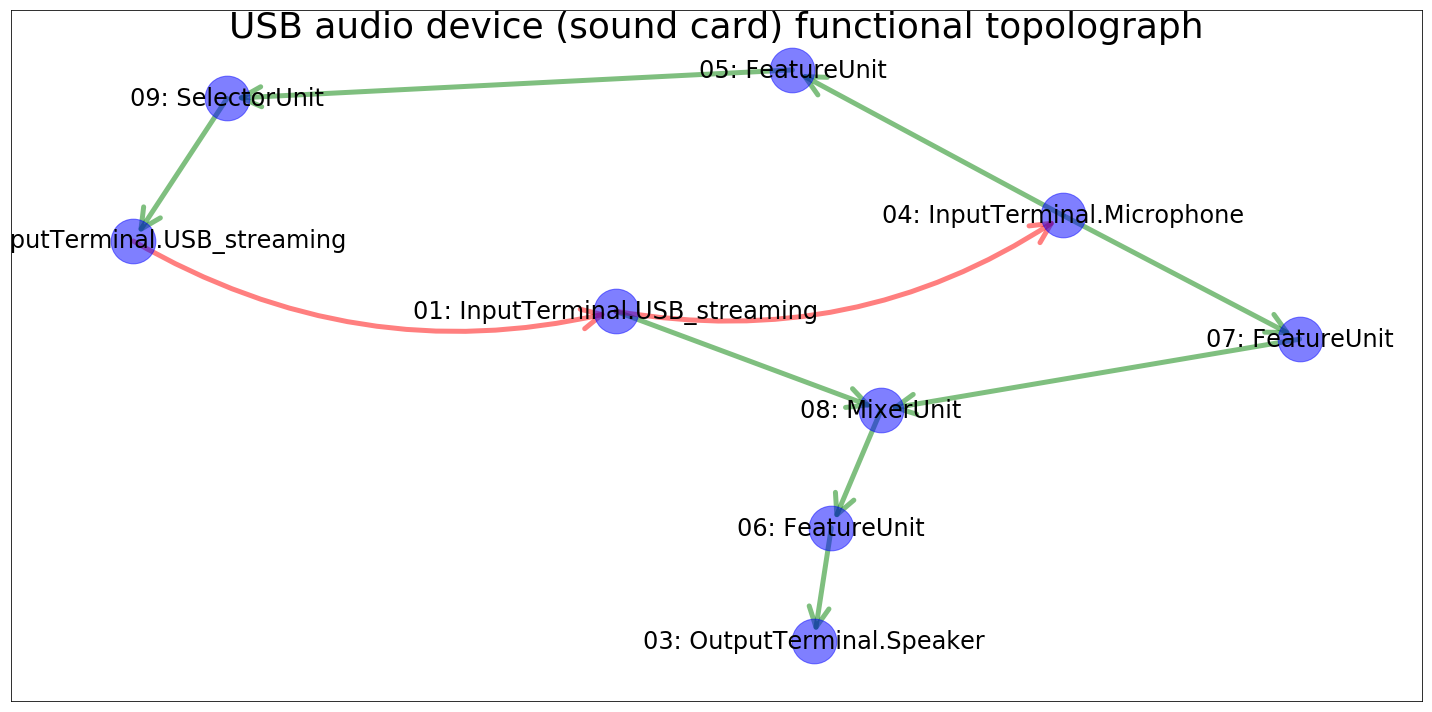

In [5]:
from usb_audio.orm import uac20, uac10

idVendor = 0x1b3f
idProduct = 0x2008

# dev = uac10.UACdevice(vid = idVendor, pid = idProduct)
dev = uac20.UACdevice(vid = idVendor, pid = idProduct)
# print(dev)


fig = plt.figure(figsize = (20, 10))
title = 'USB audio device (sound card) functional topolograph' #.title()
fig.suptitle(title, fontsize = 36)

dev.draw_topolograph(label_font_size = 24, edge_width = 5, edge_arrowstyle = '->', edge_arrowsize = 50,)

plt.tight_layout()
plt.savefig(title + '.png')
plt.show()

dev.reset()